# Garmin Tests Report

## This notebook is for tests only

In [1]:
import tcxtools
import graph
import helper
import correlation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [2]:
filename = 'activity_5274851554'

# Reading .TCX file

In [3]:
tcx_data = tcxtools.TCXPandas('./rowing/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [4]:
csv_data = pd.read_csv('./rowing/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(helper.get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv = csv_data.head(-1)
csv = csv[~(csv['Calories'] == 0)]

In [5]:
csv = csv_data.head(-1)
csv_summary = csv_data.tail(1)

In [6]:
csv_summary

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg HR,Max HR,Elev Gain,Elev Loss,Avg Stroke Rate,Max Stroke Rate,Avg Distance per Stroke,Calories,Best Pace,Moving Time,Avg Moving Pace,Time (s),Power (w),Energy (kj)
15,Summary,44:46,44:46,"6,066",3:41,132,171,1,3,20,51,8.55,326,1:59,40:45,3:22,2686,507.81236,1363.984


# Tracking points

In [16]:
tracks.dropna(inplace=True)
tracks.rename(columns={'distance':'distance cumulative'}, inplace=True)
tracks['distance'] = tracks['distance cumulative'].diff()
tracks

,latitude,longitude,altitude,distance cumulative,hr,speed (m/s),speed (km/h),distance
time,,,,,,,,
2020-07-22 10:17:23+00:00,-15.823883,-47.882752,1002.799988,0.970000,106.0,0.877,3.1572,NaN
2020-07-22 10:17:24+00:00,-15.823886,-47.882744,1002.799988,1.840000,104.0,0.718,2.5848,0.870000
2020-07-22 10:17:25+00:00,-15.823887,-47.882737,1002.599976,2.620000,104.0,0.924,3.3264,0.780000
2020-07-22 10:17:26+00:00,-15.823889,-47.882728,1002.599976,3.570000,105.0,0.952,3.4272,0.950000
2020-07-22 10:17:27+00:00,-15.823892,-47.882720,1002.400024,4.490000,106.0,0.886,3.1896,0.920000
...,...,...,...,...,...,...,...,...
2020-07-22 11:02:05+00:00,-15.824101,-47.882352,1001.000000,6059.970215,136.0,1.708,6.1488,1.760254
2020-07-22 11:02:06+00:00,-15.824102,-47.882367,1001.000000,6061.620117,135.0,1.577,5.6772,1.649902
2020-07-22 11:02:07+00:00,-15.824104,-47.882381,1001.000000,6063.120117,134.0,1.484,5.3424,1.500000


In [19]:
tracks['distance'].describe()

count    2666.000000
mean        2.274887
std         1.056263
min         0.000000
25%         1.942547
50%         2.500000
75%         2.890106
max         6.800049
Name: distance, dtype: float64

In [8]:
csv_summary

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg HR,Max HR,Elev Gain,Elev Loss,Avg Stroke Rate,Max Stroke Rate,Avg Distance per Stroke,Calories,Best Pace,Moving Time,Avg Moving Pace,Time (s),Power (w),Energy (kj)
15,Summary,44:46,44:46,"6,066",3:41,132,171,1,3,20,51,8.55,326,1:59,40:45,3:22,2686,507.81236,1363.984


In [9]:
df = csv[['Avg HR', 'Max HR', 'Calories', 'Max Stroke Rate', 'Avg Stroke Rate', 'Power (w)', 'Energy (kj)']]

In [10]:
corr = correlation.get_number(df)
corr

,Avg HR,Max HR,Calories,Max Stroke Rate,Avg Stroke Rate,Power (w),Energy (kj)
Avg HR,1.000000,0.562027,-0.065398,-0.384244,-0.464485,0.968313,-0.065398
Max HR,0.562027,1.000000,0.535045,0.002937,-0.184425,0.362936,0.535045
Calories,-0.065398,0.535045,1.000000,0.295405,0.069911,-0.200279,1.000000
Max Stroke Rate,-0.384244,0.002937,0.295405,1.000000,0.848343,-0.402757,0.295405
Avg Stroke Rate,-0.464485,-0.184425,0.069911,0.848343,1.000000,-0.485315,0.069911
Power (w),0.968313,0.362936,-0.200279,-0.402757,-0.485315,1.000000,-0.200279
Energy (kj),-0.065398,0.535045,1.000000,0.295405,0.069911,-0.200279,1.000000


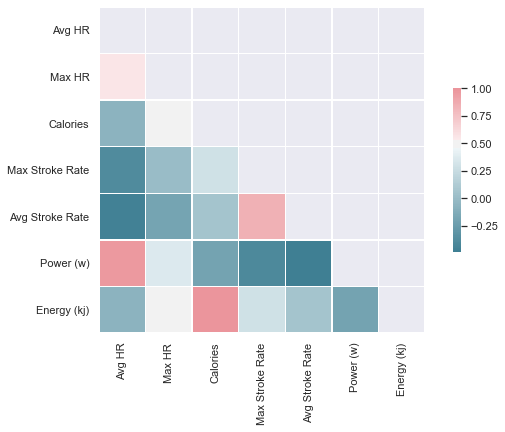

In [11]:
correlation.heatmap(corr)